In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
sys.path.append('..')

from astropy.io import fits
from astropy.table import Table

from stark import utils, analyze, plotting, measure

Could not find the pickled WD models. If you need to use these models, please re-import corv with the proper path.
/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='$T_{eff}$ [$K$]', ylabel='$v_{Stark}$ $[km/s]$'>)

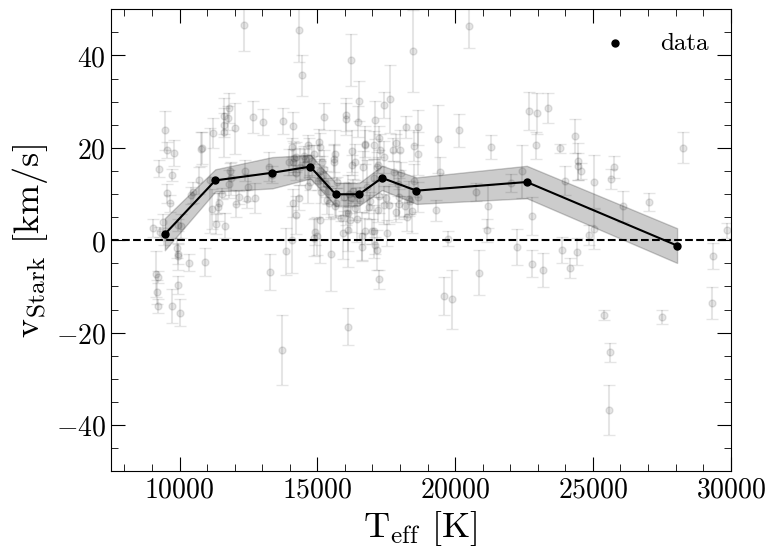

In [7]:
"""plot the stark effect as a function of temperature 
"""
lteargs = {'model' : '1d_da_nlte', 'lines' : 'abgd', 'window' : 8}
starkdf = utils.read_stark_effect(lteargs, sigmaclip=True)
teffdata, loggdata = analyze.calculate_parameter_bins(dataframe=starkdf, teffcol='TeffH', loggcol='loggH', n=10)
alldata = (starkdf.TeffH.values, starkdf.vstark.values, starkdf.e_vstark.values)
plotting.parameter_stark_plot(alldata, paramdata=teffdata, plot_zzceti=False)

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='$T_{eff}$ [$K$]', ylabel='$v_{Stark}$ $[km/s]$'>)

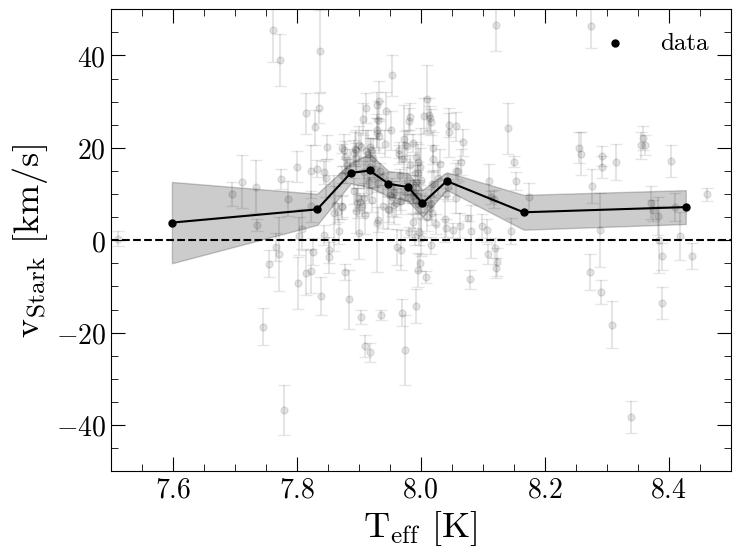

In [3]:
"""plot the stark effect as a function of logg
"""
alldata = (starkdf.loggH.values, starkdf.vstark.values, starkdf.e_vstark.values)
plotting.parameter_stark_plot(alldata, paramdata=loggdata, plot_zzceti=False,
                            xlims=(7.5, 8.5))

Text(0, 0.5, 'Median $v_\\text{Stark}$ $[km s^{-1}]$')

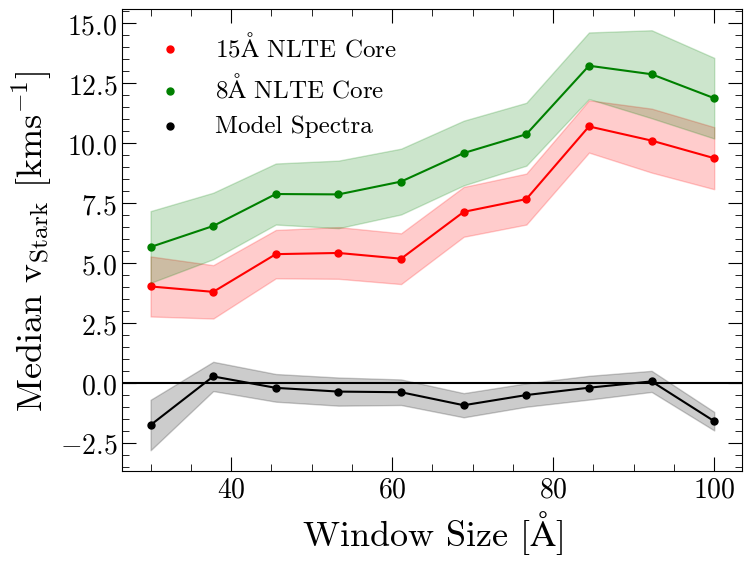

In [8]:
"""plot the median stark effect as a function of window size
"""
abgdwindows15 = analyze.windowdata(nlteargs = {'coresize' : 15, 'lines' : 'ab'})
abgdwindows8 = analyze.windowdata(nlteargs = {'coresize' : 8, 'lines' : 'ab'})
comparison = analyze.windowcomparison()

fig, ax = plt.subplots(ncols = 1, figsize=(8,6))
plotting.plot_with_shaded_error(ax, abgdwindows15[0], abgdwindows15[1], yerr=abgdwindows15[2], 
                                plot_kwargs={'color' : 'r'}, 
                                scatter_kwargs={'label' : r'$15\AA$ NLTE Core', 'color' : 'r', 'marker' : 'o'}, 
                                fill_kwargs={'color' : 'r', 'alpha' : 0.2})
plotting.plot_with_shaded_error(ax, abgdwindows8[0], abgdwindows8[1], yerr=abgdwindows8[2], 
                                plot_kwargs={'color' : 'green'}, 
                                scatter_kwargs={'label' : r'$8\AA$ NLTE Core', 'color' : 'green', 'marker' : 'o'}, 
                                fill_kwargs={'color' : 'green', 'alpha' : 0.2})
plotting.plot_with_shaded_error(ax, comparison[0], comparison[1], yerr=comparison[2], 
                                plot_kwargs={'color' : 'k'}, 
                                scatter_kwargs={'label' : 'Model Spectra', 'color' : 'k', 'marker' : 'o'}, 
                                fill_kwargs={'color' : 'k', 'alpha' : 0.2})
plt.legend(framealpha=0)
plt.axhline(y=0, c='k')
plt.xlabel(r'Window Size $[\AA]$')
plt.ylabel(r'Median $v_\text{Stark}$ $[km s^{-1}]$')